# Image Classification of Brain Tumor MRI

# Import Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import glob
import cv2
from sklearn import metrics

import tensorflow as tf
import tensorflow.keras.preprocessing.image

### Load images and labels

In [2]:
def load_images_and_labels(directory, label = int):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # Assuming all images have the ".jpg" extension
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            image = cv2.resize(image, (image_width, image_height))  # Resize the image to a fixed size
            images.append(image)
            labels.append(label)
    return images, labels

# Define image dimensions
image_width = 150
image_height = 150

# Load and preprocess images from 'no' directory (negative images)
negative_dir = './brain_tumor_dataset/no'
negative_images, negative_labels = load_images_and_labels(negative_dir, label=0)

# Load and preprocess images from 'yes' directory (positive images)
positive_dir = './brain_tumor_dataset/yes'
positive_images, positive_labels = load_images_and_labels(positive_dir, label=1)

# Combine the positive and negative images and labels
images = negative_images + positive_images
labels = negative_labels + positive_labels

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Print Array Shape
print(images.shape)
print(labels.shape)

(171, 150, 150)
(171,)


### Shuffle and Split the Dataset:

In [3]:
# Determine the split ratios for training, development, and testing datasets; ratios must add to 1.
train_ratio = 0.8  # 80% of the data for training
dev_ratio = 0.18  # 18% of the data for development/validation
test_ratio = train_ratio - dev_ratio  # Remaining data for testing

# Shuffle the data to randomize the order of samples
indices = np.arange(len(images))  # Create an array of indices for the data
np.random.shuffle(indices)  # Shuffle the indices randomly
images = images[indices]  # Reorder the data based on shuffled indices
labels = labels[indices]  # Reorder the labels accordingly

# Split the data into training, development, and testing sets
num_samples = len(images)  # Total number of samples in the dataset
num_train = int(train_ratio * num_samples)  # Number of samples for training
num_dev = int(dev_ratio * num_samples)  # Number of samples for development
num_test = int(test_ratio * num_samples)  # Number of samples for testing

# Separate the data into training images and labels
train_images = images[:num_train]
train_labels = labels[:num_train]

# Separate the data into development images and labels
dev_images = images[num_train:num_train + num_dev]
dev_labels = labels[num_train:num_train + num_dev]

# Separate the data into testing images and labels
test_images = images[num_train + num_dev:]
test_labels = labels[num_train + num_dev:]

In [4]:

print('Training Shape: ',train_images.shape)
print('Dev_Set Shape: ',dev_images.shape)
print('Test Shape: ',test_images.shape)

Training Shape:  (136, 150, 150)
Dev_Set Shape:  (30, 150, 150)
Test Shape:  (5, 150, 150)


### Visualize the Images

In [5]:
# Function to plot random images from a given dataset
def plot_random_images(images, labels, title):
    num_images_to_plot = 10  # Number of random images to plot
    random_indices = random.sample(range(len(images)), num_images_to_plot)

    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(random_indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title('Positive' if labels[idx] == 1 else 'Negative')  # Assuming 1 represents positive (tumor present) and 0 represents negative (tumor absent)
        plt.axis('off')
    plt.suptitle(title, fontsize=14)
    plt.show()

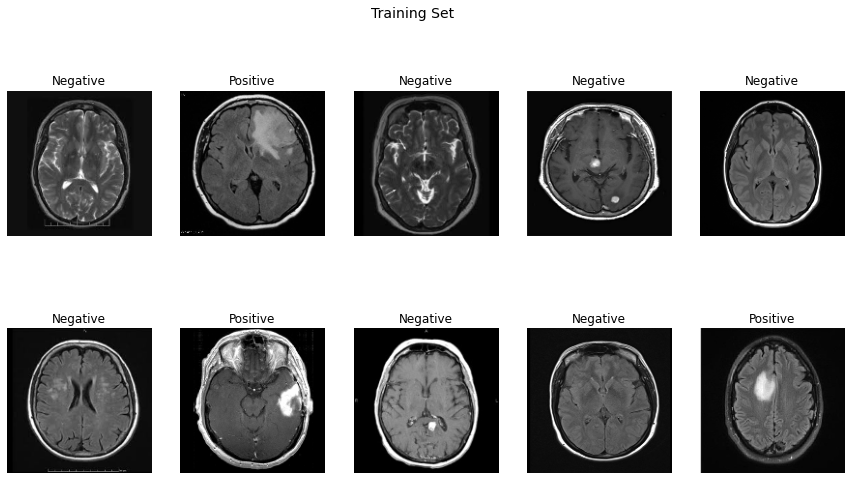

In [6]:
# Plot images from the training set
plot_random_images(train_images, train_labels, title='Training Set')

# Data Preprocessing

### Apply Channel Shift:

In [7]:
# Apply a channel shift transformation of 100 degrees to the 'train_images' dataset
train_images_shift = tf.keras.preprocessing.image.apply_channel_shift(train_images,100,channel_axis=0)

# Print the shape of the 'train_images_shift' dataset after the shear transformation
print('Training images shape: ',train_images_shift.shape)

Training images shape:  (136, 150, 150)


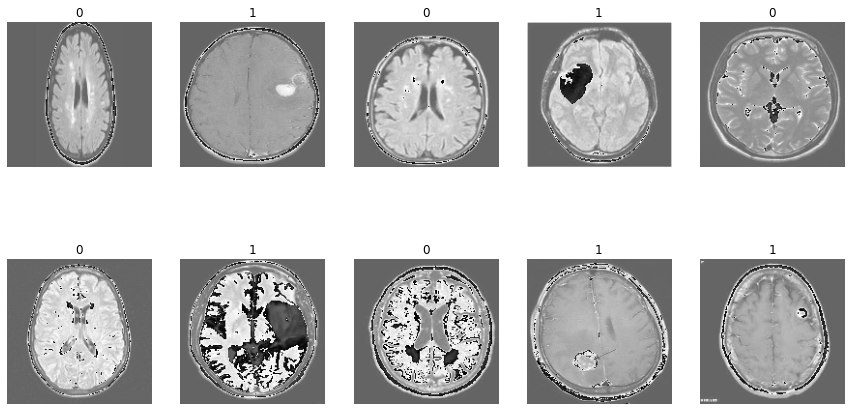

In [8]:
plt.figure(figsize=(15,8))
# Visualize a subset of the MNIST dataset
for i in range(10):
    # Create a subplot grid with 3 rows and 5 columns

    plt.subplot(2,5,i+1)

    # Display the image from the training set
    plt.imshow(train_images_shift[i],cmap='gray')


    # Set the title as the corresponding label
    plt.title(train_labels[i])

    # Disable the axis labels for cleaner visualization
    plt.axis('off')

# Show the plot
plt.show()

### Apply Random Shear:

In [9]:
# Apply a random shear transformation of 25 degrees to the 'train_images' dataset
train_images_shear = tf.keras.preprocessing.image.random_shear(train_images,25)

# Print the shape of the 'train_images_shear' dataset after the shear transformation
print('Training images shape: ',train_images_shear.shape)

Training images shape:  (136, 150, 150)


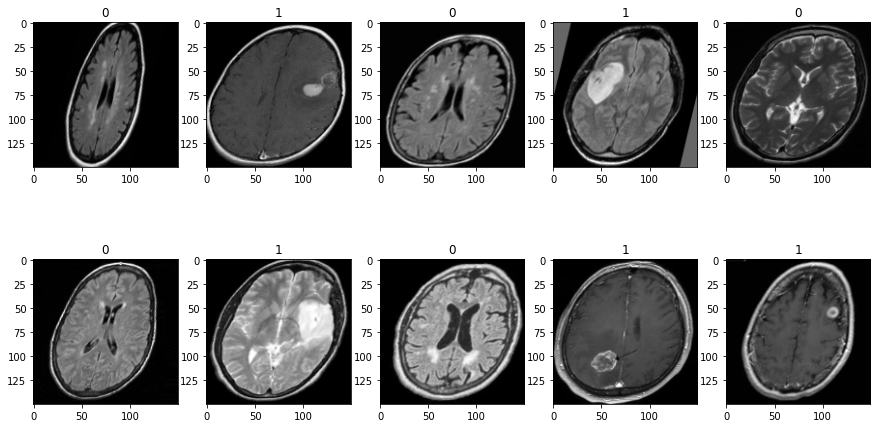

In [10]:
# Create a figure for displaying images with a specific size
plt.figure(figsize=(15, 8))

# Iterate through a range of 10 (for displaying 10 images)
for i in range(10):
    # Create a subplot grid of 2 rows and 5 columns; i+1 indicates the current subplot
    plt.subplot(2, 5, i + 1)
    
    # Display the image at index 'i' from the 'train_images_shear' dataset using a grayscale colormap
    plt.imshow(train_images_shear[i], cmap='gray')
    
    # Set the title of the subplot to the corresponding label from 'train_labels'
    plt.title(train_labels[i])

# Show the plot with the configured subplots
plt.show()


### Concat Preprocessed Images
Contatenate preprocessed images into the training data and the corresponding label.

In [11]:
# Print the shape of the shifted, sheared, and original training images
print('Shifted Images Shape: ',train_images_shift.shape)
print('Sheared Images Shape: ',train_images_shear.shape)
print('Original Training Images Shape: ',train_images.shape)

# Concatenate the shifted, sheared, and original training images along axis 0 (rows)
train_images = tf.concat([train_images,train_images_shear,train_images_shift],axis=0)

# Print the shape of the concatenated training images
print('\Concatenated Training Images Shape: \n',train_images.shape)

Shifted Images Shape:  (136, 150, 150)
Sheared Images Shape:  (136, 150, 150)
Original Training Images Shape:  (136, 150, 150)
\Concatenated Training Images Shape: 
 (408, 150, 150)


2023-10-12 09:51:36.297423: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Join Train_labes 
print('Original Training Label Shape:', train_labels.shape)

#Concatenate labels
train_labels = np.concatenate((train_labels,train_labels,train_labels))

# Print the shape of the concatenated training labels
print('Concatenated Training labels shape:',train_labels.shape)

Original Training Label Shape: (136,)
Concatenated Training labels shape: (408,)


# Modeling

### Define my Callback

In [13]:
# Create Callback on_epoch_end when accuracy reaches 70%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:
            print('\nReached 95% Accuracy so cancelling traning')
            # Stop training once the above condition is met
            self.model.stop_training = True

'''Make sure to change the desired accuracy level depending on desired model outcome.'''

'Make sure to change the desired accuracy level depending on desired model outcome.'

### Model Architeture

In [14]:
# Define Model
def conv_model():

   # Define the model
    model = tf.keras.models.Sequential([
        #First convolution layer
        tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,1)),
        tf.keras.layers.MaxPooling2D(2,2),

        #Flatten result to feed into Dense NN
        tf.keras.layers.Flatten(),
        #First Dense hidden layer
        tf.keras.layers.Dense(152,activation='relu'),
        #Output layer
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    # Compile model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [15]:
# Save your untrained model
model = conv_model()

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(train_images, train_labels, epochs=10, callbacks=[callbacks],validation_data= (dev_images,dev_labels))

Epoch 1/10
13/13 [==============================] - 2s 140ms/step - loss: 511.7133 - accuracy: 0.5490 - val_loss: 68.3697 - val_accuracy: 0.7333
Epoch 2/10
13/13 [==============================] - 2s 136ms/step - loss: 143.8349 - accuracy: 0.6275 - val_loss: 82.9317 - val_accuracy: 0.6667
Epoch 3/10
13/13 [==============================] - 2s 138ms/step - loss: 45.6980 - accuracy: 0.7941 - val_loss: 42.7424 - val_accuracy: 0.6667
Epoch 4/10
13/13 [==============================] - 2s 131ms/step - loss: 7.8464 - accuracy: 0.8873 - val_loss: 30.6057 - val_accuracy: 0.8333
Epoch 5/10
13/13 [==============================] - 2s 126ms/step - loss: 1.4222 - accuracy: 0.9485 - val_loss: 25.2278 - val_accuracy: 0.7667
Epoch 6/10
13/13 [==============================] - ETA: 0s - loss: 1.2230 - accuracy: 0.9608
Reached 95% Accuracy so cancelling traning
13/13 [==============================] - 2s 128ms/step - loss: 1.2230 - accuracy: 0.9608 - val_loss: 28.1893 - val_accuracy: 0.8333


### Confusion Matrix ###

In [16]:
# Make predictions using your neural network model on the test images.
y_pred = model.predict(test_images)

# Convert the predicted probabilities to binary predictions using a threshold of 0.5.
# Probabilities greater than 0.5 will be converted to 1, and those less than or equal to 0.5 will be converted to 0.
y_pred = (y_pred > 0.5).astype(int)

# Assign the true labels from your test dataset to the variable y_true.
y_true = test_labels

# Print the shape of the y_pred array, which represents the shape of the predicted binary labels.
print("Shape of y_pred:", y_pred.shape)

# Print the shape of the y_true array, which represents the shape of the true labels from the test dataset.
print("Shape of y_true:", y_true.shape)

1/1 [==============================] - 0s 102ms/step
Shape of y_pred: (5, 1)
Shape of y_true: (5,)


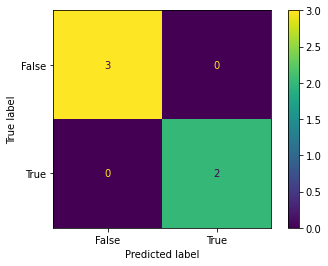

In [17]:
# Calculate the confusion matrix using true labels (y_true) and predicted labels (y_pred)
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)

# Create a ConfusionMatrixDisplay object for visualization, providing the confusion matrix and display labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# Plot the confusion matrix
cm_display.plot()

# Display the plot
plt.show()